## Time Series Analysis and Forecasting using ETS model

- Time series analysis is all about understanding of the given historical data, in order to extract meaningful statistics, patterns and other characteristics, forecasting is to predict its future behaviour

#### The Goal
The goal of this lab is to forecast future values with "AirPassengers" dataset, using ETS forecasting technique.

#### About the "AirPassengers" dataset
Airline data showing monthly totals of international airline passengers, from 1949 to 1960

#### Download and Install Python Libraries

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install scikit-learn
#!pip install scipy
#!pip install seaborn
#!pip install matplotlib
#!pip install statsmodels

#### Import Python Libraries

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# these two lines of code needs to be run when using pandas dataframes within matplotlib
# if not, you would get some warning/error messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Switching off unnecessary warning messages 
import warnings
warnings.filterwarnings('ignore')





#### Process map
Below illustrates a 9-step process used during this lab.

    1.	Import Data
    2.	Data Quality Checks
    3.	Data Cleansing
    4.	Data Pre-processing
    5.	Visualisations
    6.	Model: Build
    7.	Model: Evaluation
    8.	Model: Predictions
    9.	Model: Save Predictions

#### 1. Import Data

In [3]:
# Reading data from a Excel file and saving that data into a dataframe called "df"
df = pd.read_excel("AirPassengers.xlsx")
df

,TimeStamp,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


#### 2. Data Quality Checks

    2.1 Check data
    2.2 Check shape of data
    2.3 Check for duplicates
    2.4 Check for missing values

In [4]:
# 2.1
# Viewing top 5 records

df.head()

,TimeStamp,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
# 2.2
# Looking at the structure of the dataframe

df.shape

(144, 2)

In [6]:
# 2.3
# Let’s use duplicated() function to identify how many duplicate records there are in the dataset

df.duplicated().sum()

0

In [7]:
# 2.4
# This method prints out information about a dataframe including the index, dtype, columns, non-null values and memory usage
# This method is also useful for finding out missing values in a dataset
# if found, we can use interpolation techniques to rectify those missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TimeStamp   144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


#### 3. Data Cleansing

    3.1 Remove duplicates
    3.2 Fill missing values

In [8]:
# 3.1
# This is how you remove all the duplicates from the dataset using drop_duplicates() function

# df = df.drop_duplicates()

In [9]:
# 3.2
# Fill missing values (NaN, Null) with median value of a column

# This is how you fix a missing value for a specific column
# df.Passengers = df.Passengers.fillna(df.Passengers.median())
# df

#### 4. Data Pre-processing

In [10]:
# Currently the "df" is a dataframe object, but for time-series analysis this data needs to be reformatted.

type(df)

pandas.core.frame.DataFrame

#### Creation of the time-series object
#### Step1:
- It is good practice to create an index to explain the behaviour of the time-series, 
- This is mainly done as a support measure to further explain the frequency of the time-series. 
- Think of this as a better formatted version of the” Datestamps”. 
- Index will be used during model building stage.


[Learn more about different time-series frequencies found in python] (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [11]:
dti = pd.date_range(start ='1949-01-01', freq ='MS', periods = 144)
dti

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

#### Step2:

In [12]:
# Creating a pandas time-series object using "dti" index 

df2 = pd.Series(data=list(df.Passengers), index=dti)
print(df2)

1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Length: 144, dtype: int64


In [13]:
# As you can see this new "df2" is no longer a dataframe object, it's a series object

type(df2)

pandas.core.series.Series

#### 5. Visualisations

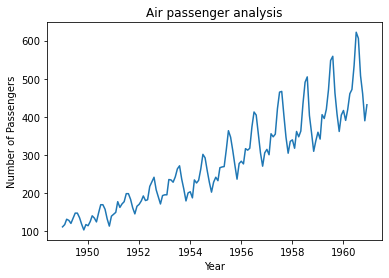

In [14]:
# Creating a lineplot using matplotlib package

plt.plot(df2)
plt.title("Air passenger analysis")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

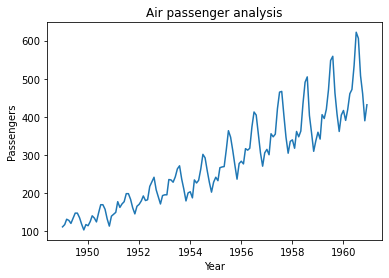

In [15]:
# Creating a lineplot using seaborn package

sns.lineplot(data=df2)
plt.title("Air passenger analysis")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

#### 6. Model: Build

In [16]:
# Creation of the ETS Model using ExponentialSmoothing() function

model = ExponentialSmoothing(df2, seasonal_periods=12, trend='add', seasonal='mul', freq="MS", dates=dti)
fit1 = model.fit()

#### 7. Model: Evaluation

In [17]:
fit1.summary()

Dep. Variable:,None,No. Observations:,144
Model:,ExponentialSmoothing,SSE,15952.900
Optimized:,True,AIC,709.892
Trend:,Additive,BIC,757.409
Seasonal:,Multiplicative,AICC,715.364
Seasonal Periods:,12,Date:,"Thu, 02 Dec 2021"
Box-Cox:,False,Time:,14:23:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3185832,alpha,True
smoothing_trend,8.5319e-07,beta,True


#### 8. Model: Predictions

In [18]:
# Predicting for 12 months

passengers_forecast = fit1.forecast(steps=12)
passengers_forecast

1961-01-01    445.242454
1961-02-01    418.225415
1961-03-01    465.310035
1961-04-01    494.950961
1961-05-01    505.475821
1961-06-01    573.312691
1961-07-01    663.596227
1961-08-01    654.903943
1961-09-01    546.760768
1961-10-01    488.446592
1961-11-01    415.723486
1961-12-01    460.377771
Freq: MS, dtype: float64

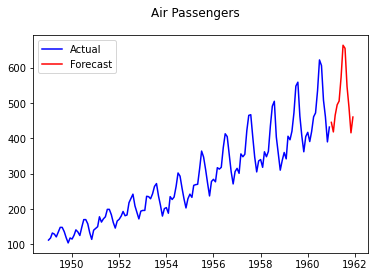

In [19]:
### Visualising the forecasted values in a line chart

# creating the line chart object using matplotlib
fig = plt.figure()
fig.suptitle('Air Passengers')

# creating two charts to show actual and forecasted values
Actual, = plt.plot(df2.index, df2, 'blue', label='Actual')
predicted, = plt.plot(passengers_forecast.index, passengers_forecast, 'red', label='Forecast')

plt.legend(handles=[Actual, predicted])
plt.show()

#### 8. Model: Save Predictions

In [20]:
# Save the Predictions to a CSV file

passengers_forecast.to_csv("AirPassengersPredicted.csv", header=False, index=True, encoding="utf-8")